## Cohort & Retention

In [3]:
import pandas as pd

users = pd.read_csv('../data/cleaned/users_cleaned.csv', parse_dates=['signup_date'])
transactions = pd.read_csv('../data/cleaned/transactions_cleaned.csv', parse_dates=['transaction_date'])

In [4]:
# first_event per user
first_tx = transactions.groupby('user_id')['transaction_date'].min().reset_index().rename(columns={'transaction_date':'first_tx'})
users = users.merge(first_tx, on='user_id', how='left')


transactions = transactions.merge(first_tx, on='user_id', how='left')
transactions['cohort_day'] = (transactions['transaction_date'].dt.floor('D') - transactions['first_tx'].dt.floor('D')).dt.days


cohort = transactions.groupby(['first_tx', 'cohort_day']).agg(active_users=('user_id','nunique')).reset_index()

In [5]:
# pivot
cohort_pivot = cohort.pivot_table(index='first_tx', columns='cohort_day', values='active_users')

In [6]:
# Conversion to retention rate
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.div(cohort_size, axis=0)

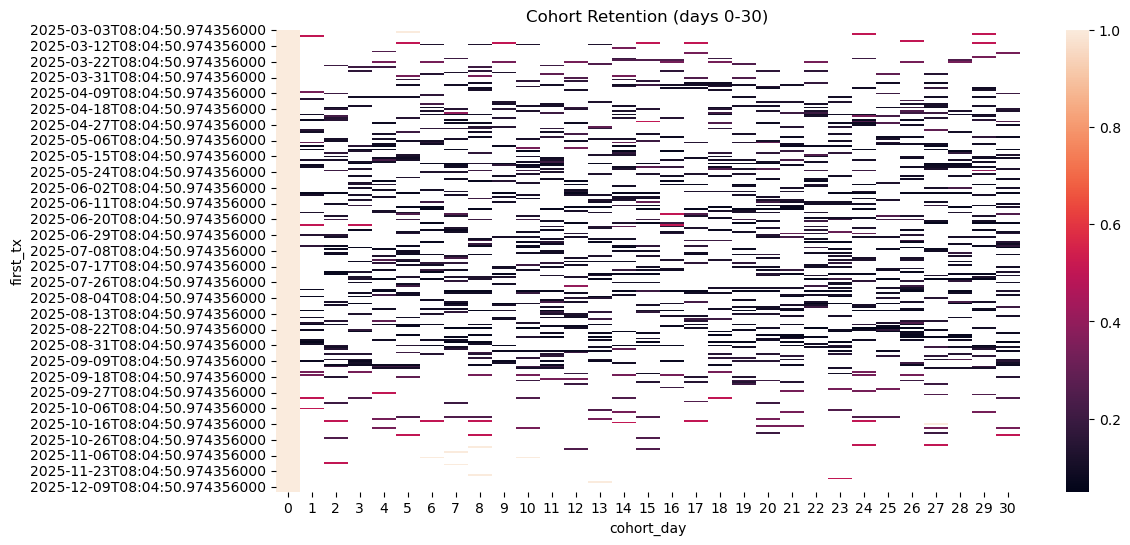

In [7]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(retention.iloc[:,:31], annot=False, fmt='.2f')
plt.title('Cohort Retention (days 0-30)')
plt.show()

In [8]:
cohort

,first_tx,cohort_day,active_users
0,2025-03-03 08:04:50.974356,0,2
1,2025-03-03 08:04:50.974356,33,1
2,2025-03-03 08:04:50.974356,68,1
3,2025-03-03 08:04:50.974356,98,1
4,2025-03-04 08:04:50.974356,0,1
...,...,...,...
3913,2025-12-01 08:04:50.974356,0,1
3914,2025-12-07 08:04:50.974356,0,1
3915,2025-12-09 08:04:50.974356,0,1
3916,2025-12-10 08:04:50.974356,0,1


In [9]:
# Save
cohort.to_csv("../data/cohort_analysis.csv", index=False)